In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
import pandas as pd

url = "../data/togo-dapaong_qc.csv"


df = pd.read_csv(url)
print(df.shape)
df.head()

(525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [3]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [4]:
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB   

In [5]:
print("the description of the dataset:")
print(df.describe())

the description of the dataset:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
2

In [6]:
print("Missing values:")
print(df.isna().sum())

Missing values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [7]:
missing_percentage = df.isna().sum() * 100 / len(df)
high_null_columns = missing_percentage[missing_percentage > 5]
print(high_null_columns)

Comments    100.0
dtype: float64


In [8]:
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
missing_report = df[columns_to_check].isna().sum()
print("Missing values:\n", missing_report)

Missing values:
 GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


In [9]:
for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']:
    invalid = df[df[col] < 0]
    print(f"{col}: {len(invalid)} negative values")


GHI: 257385 negative values
DNI: 0 negative values
DHI: 0 negative values
ModA: 0 negative values
ModB: 0 negative values
WS: 0 negative values
WSgust: 0 negative values


In [10]:
columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z = np.abs(stats.zscore(df[columns]))
z_outliers_mask = (z > 3).any(axis=1)
print("Z-score outlier rows:", int(z_outliers_mask.sum()))

Z-score outlier rows: 9251


In [11]:
for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)
    print(f"Filled missing values in {col} with median: {median_value}")

Filled missing values in GHI with median: 2.1
Filled missing values in DNI with median: 0.0
Filled missing values in DHI with median: 2.5
Filled missing values in ModA with median: 4.4
Filled missing values in ModB with median: 4.3
Filled missing values in WS with median: 2.2
Filled missing values in WSgust with median: 2.9


In [12]:
df.to_csv("../data/togo_clean.csv", index=False)

In [13]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

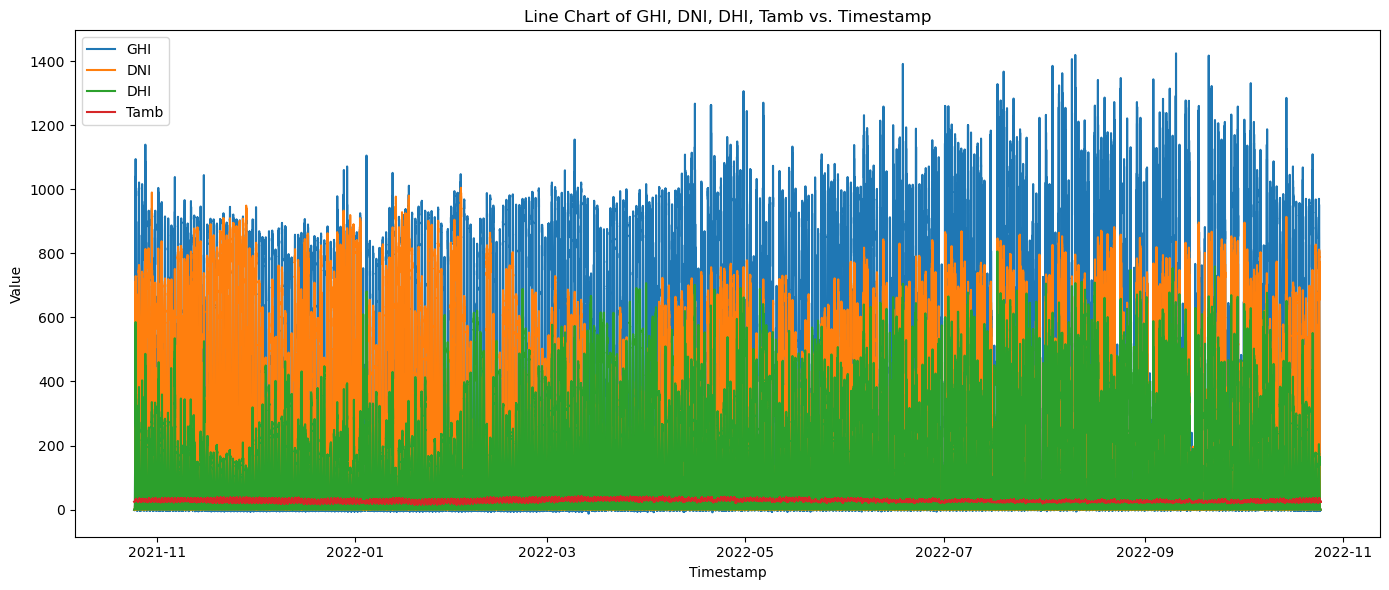

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(df['Timestamp'], df[col], label=col)

plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Line Chart of GHI, DNI, DHI, Tamb vs. Timestamp')
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
#Trends for the month:
#In spring and summer, solar irradiance (GHI, DNI, DHI) peaks, while in
#winter, it drops due to reduced daylight and increased cloudiness.
#Trends for the day:
#During the day, irradiance increases, while at night it decreases. The DNI shows sharper daytime peaks than the GHI or DHI, reflecting periods of clear skies. As with irradiance, ambient temperature (Tamb) rises during the day and cools at night.
#An anomaly:
#An invalid irradiance value is caused by a sensor or logging error. Sensor faults, cloud changes, or data recording problems can cause sudden spikes or dips in irradiance or temperature.

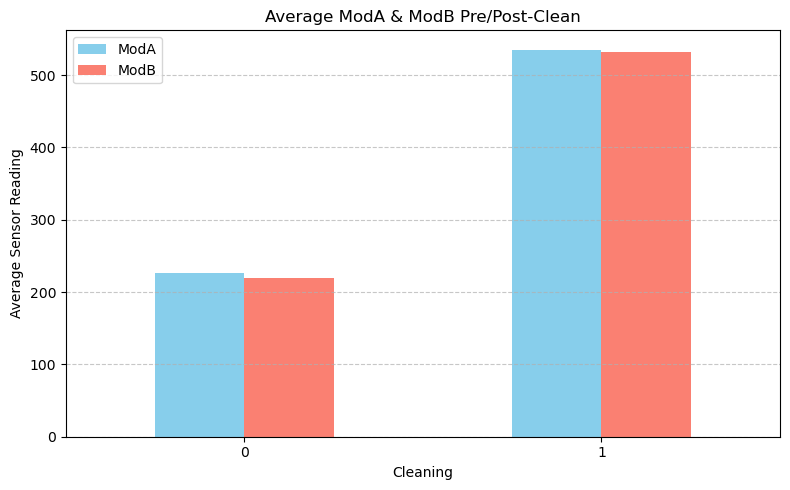

In [16]:
df_original = pd.read_csv("../data/togo-dapaong_qc.csv")
df_cleaned = pd.read_csv("../data/togo_clean.csv")

# Create a flag column in the original dataset
df_original['Cleaning'] = 'pre-clean'

# Create a flag column in the cleaned dataset
df_cleaned['Cleaning'] = 'post-clean'

# Combine both datasets
df_combined = pd.concat([df_original, df_cleaned], ignore_index=True)

grouped = df.groupby('Cleaning')[['ModA', 'ModB']].mean()

import matplotlib.pyplot as plt
grouped.plot(kind='bar', figsize=(8, 5), color=['skyblue', 'salmon'])
plt.title('Average ModA & ModB Pre/Post-Clean')
plt.ylabel('Average Sensor Reading')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

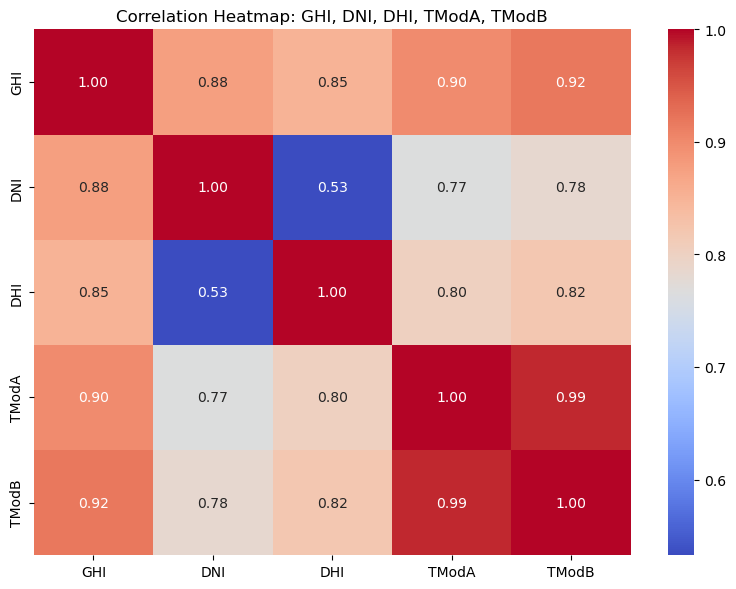

In [17]:
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df[corr_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: GHI, DNI, DHI, TModA, TModB')
plt.tight_layout()
plt.show()


WS vs. GHI


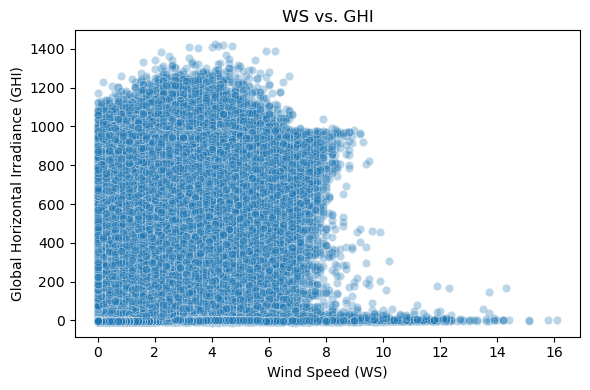

WSgust vs. GHI


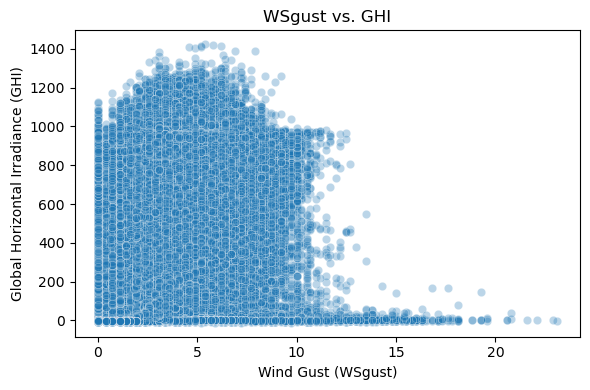

WD vs. GHI


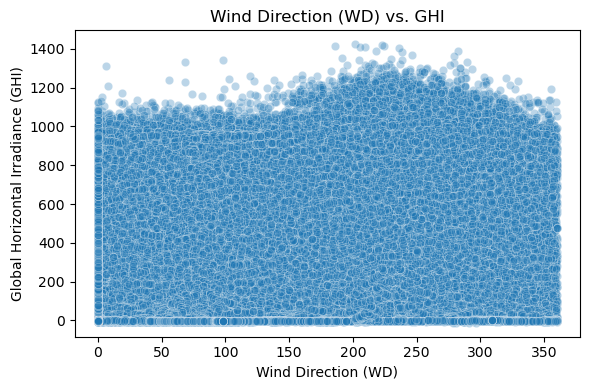

RH vs. Tamb


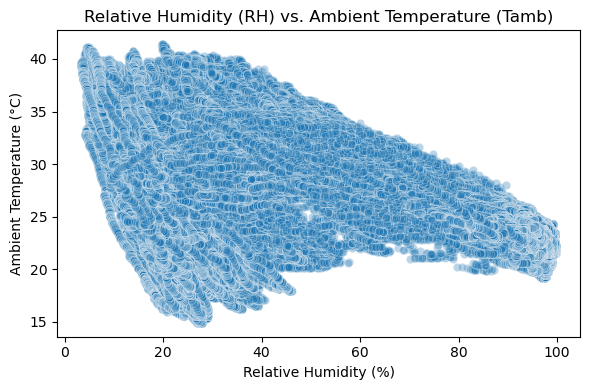

RH vs. GHI


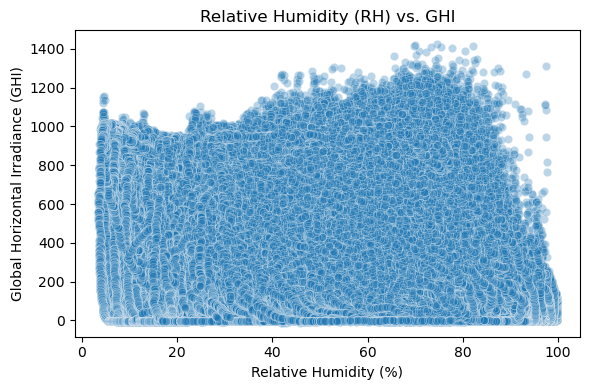

In [18]:
print("WS vs. GHI")
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='WS', y='GHI', alpha=0.3)
plt.title('WS vs. GHI')
plt.xlabel('Wind Speed (WS)')
plt.ylabel('Global Horizontal Irradiance (GHI)')
plt.tight_layout()
plt.show()

print("WSgust vs. GHI")
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='WSgust', y='GHI', alpha=0.3)
plt.title('WSgust vs. GHI')
plt.xlabel('Wind Gust (WSgust)')
plt.ylabel('Global Horizontal Irradiance (GHI)')
plt.tight_layout()
plt.show()

print("WD vs. GHI")
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='WD', y='GHI', alpha=0.3)
plt.title('Wind Direction (WD) vs. GHI')
plt.xlabel('Wind Direction (WD)')
plt.ylabel('Global Horizontal Irradiance (GHI)')
plt.tight_layout()
plt.show()

print("RH vs. Tamb")
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='RH', y='Tamb', alpha=0.3)
plt.title('Relative Humidity (RH) vs. Ambient Temperature (Tamb)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.tight_layout()
plt.show()

print("RH vs. GHI")
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='RH', y='GHI', alpha=0.3)
plt.title('Relative Humidity (RH) vs. GHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Global Horizontal Irradiance (GHI)')
plt.tight_layout()
plt.show()


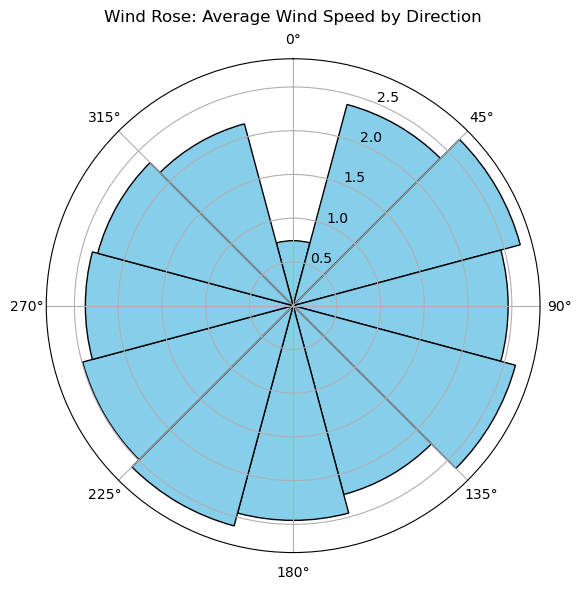

In [19]:
bins = np.arange(0, 361, 30)
labels = [f"{b}°-{b+30}°" for b in bins[:-1]]
df['WD_bin'] = pd.cut(df['WD'], bins=bins, labels=labels, right=False)
ws_by_dir = df.groupby('WD_bin')['WS'].mean().reset_index()
ws_by_dir['angle'] = bins[:-1] * np.pi / 180  
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, polar=True)
bars = ax.bar(ws_by_dir['angle'], ws_by_dir['WS'], width=np.pi/6, bottom=0, color='skyblue', edgecolor='black')

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title('Wind Rose: Average Wind Speed by Direction', va='bottom')
plt.tight_layout()
plt.show()


Histogram for GHI


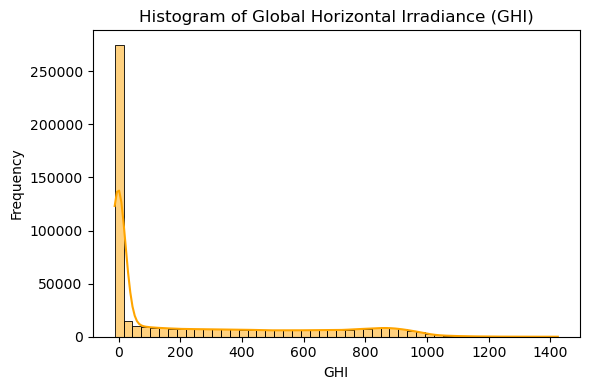

Histogram for WS


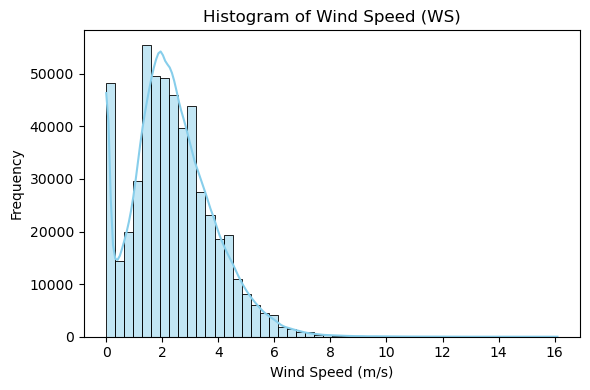

In [20]:
print("Histogram for GHI")
plt.figure(figsize=(6, 4))
sns.histplot(df['GHI'], bins=50, kde=True, color='orange')
plt.title('Histogram of Global Horizontal Irradiance (GHI)')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("Histogram for WS")
plt.figure(figsize=(6, 4))
sns.histplot(df['WS'], bins=50, kde=True, color='skyblue')
plt.title('Histogram of Wind Speed (WS)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Correlation with RH:
 RH      1.000000
Tamb   -0.400410
GHI    -0.258077
DNI    -0.327887
DHI    -0.155016
Name: RH, dtype: float64


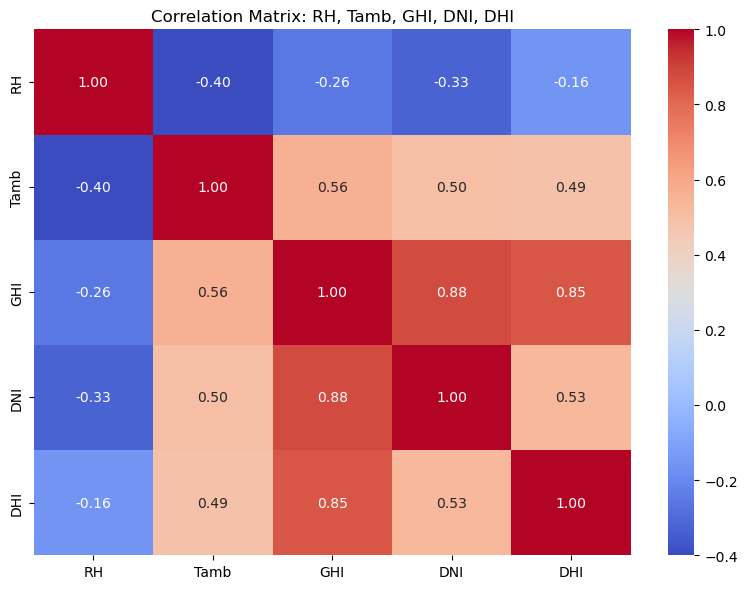

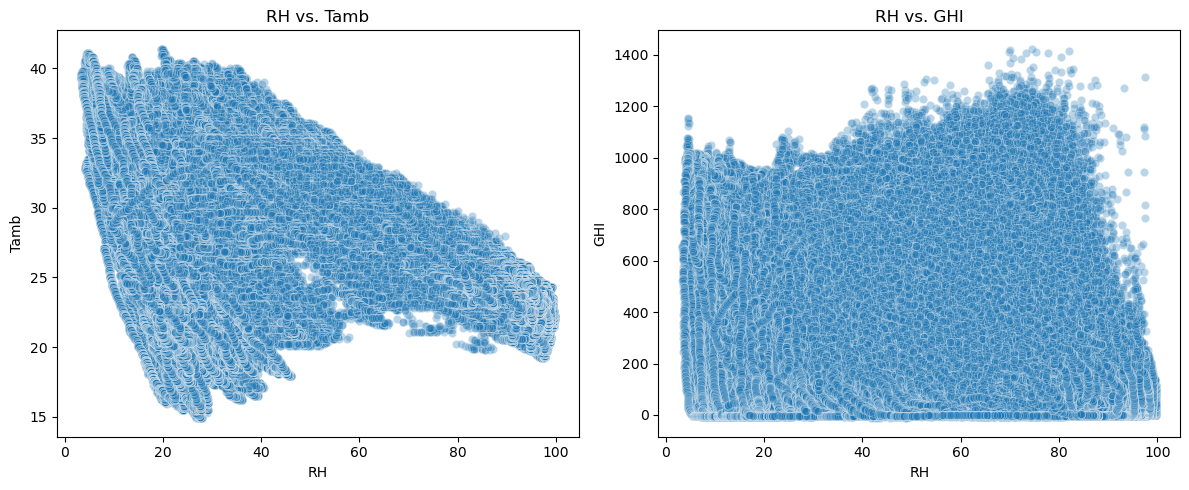

Average Tamb and GHI by RH bin:
                 Tamb         GHI
RH_bin                          
Low        28.730783  288.151234
Medium     30.467105  305.793139
High       26.990897  213.637388
Very High  23.147657   25.869143


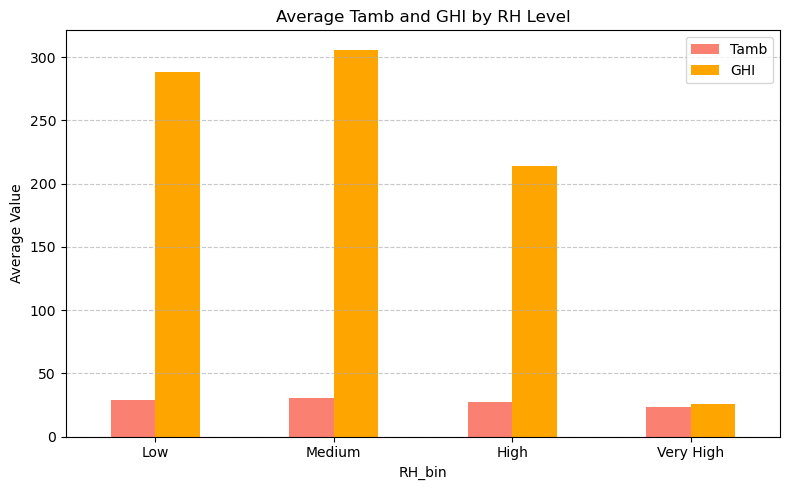

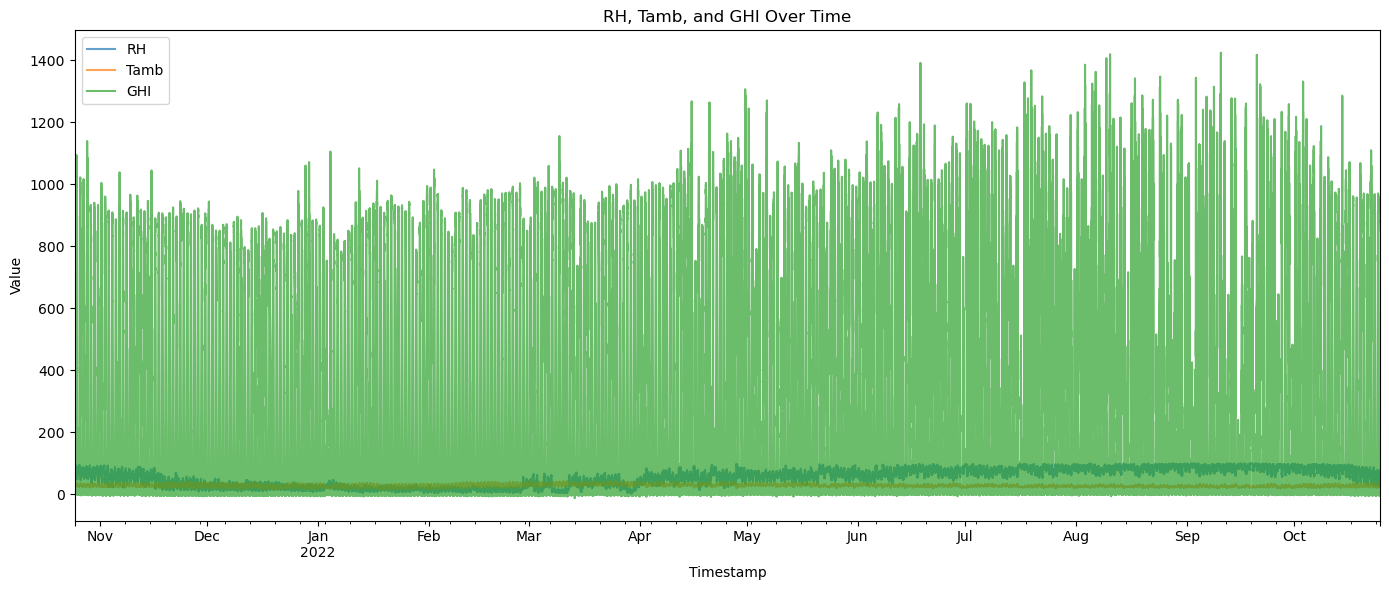

In [21]:
cols = ['RH', 'Tamb', 'GHI', 'DNI', 'DHI']
correlation_matrix = df[cols].corr()
print("Correlation with RH:\n", correlation_matrix['RH'])
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: RH, Tamb, GHI, DNI, DHI')
plt.tight_layout()
plt.show()
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(data=df, x='RH', y='Tamb', alpha=0.3, ax=axes[0])
axes[0].set_title('RH vs. Tamb')
sns.scatterplot(data=df, x='RH', y='GHI', alpha=0.3, ax=axes[1])
axes[1].set_title('RH vs. GHI')
plt.tight_layout()
plt.show()
df['RH_bin'] = pd.cut(df['RH'], bins=[0, 30, 60, 90, 100], labels=['Low', 'Medium', 'High', 'Very High'])
grouped = df.groupby('RH_bin')[['Tamb', 'GHI']].mean()
print("Average Tamb and GHI by RH bin:\n", grouped)
grouped.plot(kind='bar', figsize=(8, 5), color=['salmon', 'orange'])
plt.title('Average Tamb and GHI by RH Level')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
df.set_index('Timestamp')[['RH', 'Tamb', 'GHI']].plot(figsize=(14, 6), alpha=0.7)
plt.title('RH, Tamb, and GHI Over Time')
plt.ylabel('Value')
plt.tight_layout()
plt.show()


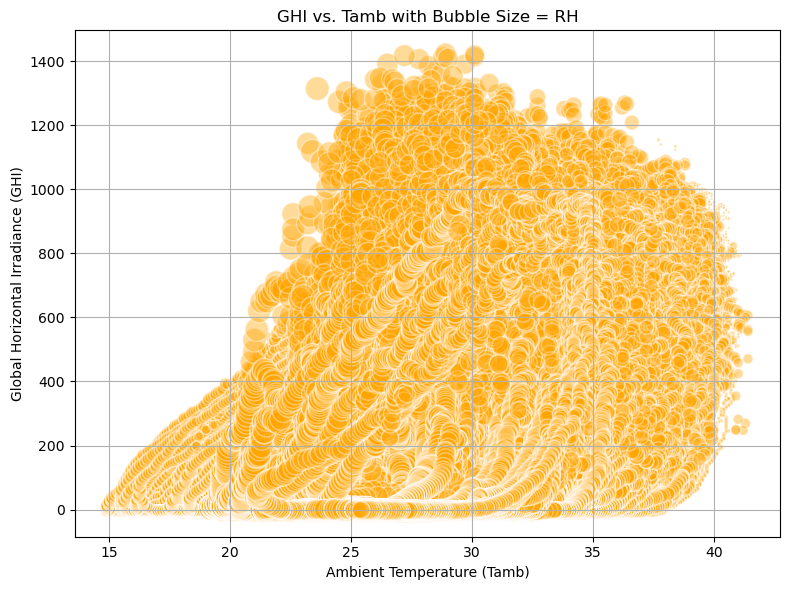

In [22]:
bubble_size = df['RH']  
size_scaled = (bubble_size - bubble_size.min()) / (bubble_size.max() - bubble_size.min()) * 300
plt.figure(figsize=(8, 6))
plt.scatter(df['Tamb'], df['GHI'], s=size_scaled, alpha=0.4, c='orange', edgecolors='w')
plt.xlabel('Ambient Temperature (Tamb)')
plt.ylabel('Global Horizontal Irradiance (GHI)')
plt.title('GHI vs. Tamb with Bubble Size = RH')
plt.grid(True)
plt.tight_layout()
plt.show()
